In [624]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [625]:
df = pd.read_csv("Sepsis_Cases_Log.csv")

In [626]:
df = df.drop(columns=['org:group', 'Complete Timestamp', 'Variant', 'Variant index', 'Diagnose', 'lifecycle:transition'])

In [627]:
df.head()

,Case ID,Activity,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,...,DiagnosticUrinaryCulture,SIRSCritLeucos,Oligurie,DiagnosticLacticAcid,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,Leucocytes,CRP,LacticAcid
0,A,ER Registration,True,True,True,True,True,True,True,True,...,True,False,False,True,False,True,True,NaN,NaN,NaN
1,A,Leucocytes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6,NaN,NaN
2,A,CRP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN
3,A,LacticAcid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2
4,A,ER Triage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [628]:
df_act_flow = pd.DataFrame()

# Loop through each unique Case ID
for case in df['Case ID'].unique():
    # Filter the merged_df for the current Case ID
    case_merged_df = df[df['Case ID'] == case]
    
    # Extract the activities as a list
    activity_flow = case_merged_df['Activity'].tolist()
    
    # Add the Case ID as the first column and the activities as subsequent columns
    row_merged_df = [case] + activity_flow
    
    # Append the row to the final DataFrame
    df_act_flow = pd.concat([df_act_flow, pd.DataFrame([row_merged_df])], ignore_index=True)

# Rename columns: first column as 'Case ID', remaining columns as 'Activity 1', 'Activity 2', etc.
columns = ['Case ID'] + [f'Activity {i+1}' for i in range(df_act_flow.shape[1] - 1)]
df_act_flow.columns = columns

# Inspect the resulting DataFrame
print(df_act_flow.head(10))



  Case ID       Activity 1  Activity 2        Activity 3      Activity 4  \
0       A  ER Registration  Leucocytes               CRP      LacticAcid   
1       B  ER Registration   ER Triage               CRP      LacticAcid   
2       C  ER Registration   ER Triage  ER Sepsis Triage      Leucocytes   
3       D  ER Registration   ER Triage  ER Sepsis Triage             CRP   
4       E  ER Registration   ER Triage  ER Sepsis Triage       IV Liquid   
5       F  ER Registration   ER Triage  ER Sepsis Triage      Leucocytes   
6       G  ER Registration   ER Triage  ER Sepsis Triage       IV Liquid   
7       H  ER Registration   ER Triage  ER Sepsis Triage             CRP   
8       I  ER Registration   ER Triage  ER Sepsis Triage  IV Antibiotics   
9       J  ER Registration   ER Triage  ER Sepsis Triage             CRP   

       Activity 5        Activity 6      Activity 7      Activity 8  \
0       ER Triage  ER Sepsis Triage       IV Liquid  IV Antibiotics   
1      Leucocytes  ER

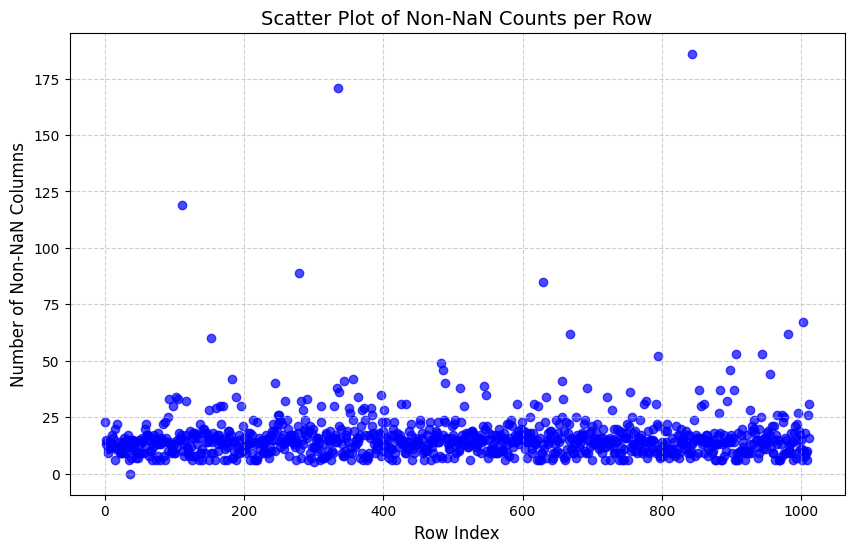

In [629]:

# Step 1: Count the number of non-NaN values for each row
df_act_flow['Non-NaN Count'] = df_act_flow.notnull().sum(axis=1)

# Step 2: Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_act_flow.index, df_act_flow['Non-NaN Count'], alpha=0.7, color='blue')
plt.title('Scatter Plot of Non-NaN Counts per Row', fontsize=14)
plt.xlabel('Row Index', fontsize=12)
plt.ylabel('Number of Non-NaN Columns', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [630]:
# Step 1: Count the number of non-NaN values for each row
df_act_flow['Non-NaN Count'] = df_act_flow.notnull().sum(axis=1)

# Step 2: Filter rows to keep only those with Non-NaN Count <= 50
df_act_flow_filtered = df_act_flow[df_act_flow['Non-NaN Count'] <= 30]

# Step 3: Drop the 'Non-NaN Count' column as it is no longer needed
df_act_flow_filtered = df_act_flow_filtered.drop(columns=['Non-NaN Count'])

# Display the filtered merged_dfFrame
df_act_flow_filtered.head()


,Case ID,Activity 1,Activity 2,Activity 3,Activity 4,Activity 5,Activity 6,Activity 7,Activity 8,Activity 9,...,Activity 176,Activity 177,Activity 178,Activity 179,Activity 180,Activity 181,Activity 182,Activity 183,Activity 184,Activity 185
0,A,ER Registration,Leucocytes,CRP,LacticAcid,ER Triage,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B,ER Registration,ER Triage,CRP,LacticAcid,Leucocytes,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C,ER Registration,ER Triage,ER Sepsis Triage,Leucocytes,CRP,IV Liquid,IV Antibiotics,Admission NC,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D,ER Registration,ER Triage,ER Sepsis Triage,CRP,LacticAcid,Leucocytes,IV Liquid,IV Antibiotics,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E,ER Registration,ER Triage,ER Sepsis Triage,IV Liquid,CRP,Leucocytes,LacticAcid,IV Antibiotics,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [631]:
# Step 4: Keep only the first 52 columns
df_act_flow_filtered = df_act_flow_filtered.iloc[:, :30]

# Display the updated merged_dfFrame
df_act_flow_filtered.head()


,Case ID,Activity 1,Activity 2,Activity 3,Activity 4,Activity 5,Activity 6,Activity 7,Activity 8,Activity 9,...,Activity 20,Activity 21,Activity 22,Activity 23,Activity 24,Activity 25,Activity 26,Activity 27,Activity 28,Activity 29
0,A,ER Registration,Leucocytes,CRP,LacticAcid,ER Triage,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,CRP,Leucocytes,Release A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B,ER Registration,ER Triage,CRP,LacticAcid,Leucocytes,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C,ER Registration,ER Triage,ER Sepsis Triage,Leucocytes,CRP,IV Liquid,IV Antibiotics,Admission NC,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D,ER Registration,ER Triage,ER Sepsis Triage,CRP,LacticAcid,Leucocytes,IV Liquid,IV Antibiotics,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E,ER Registration,ER Triage,ER Sepsis Triage,IV Liquid,CRP,Leucocytes,LacticAcid,IV Antibiotics,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [632]:
df_act_flow_filtered.shape

(949, 30)

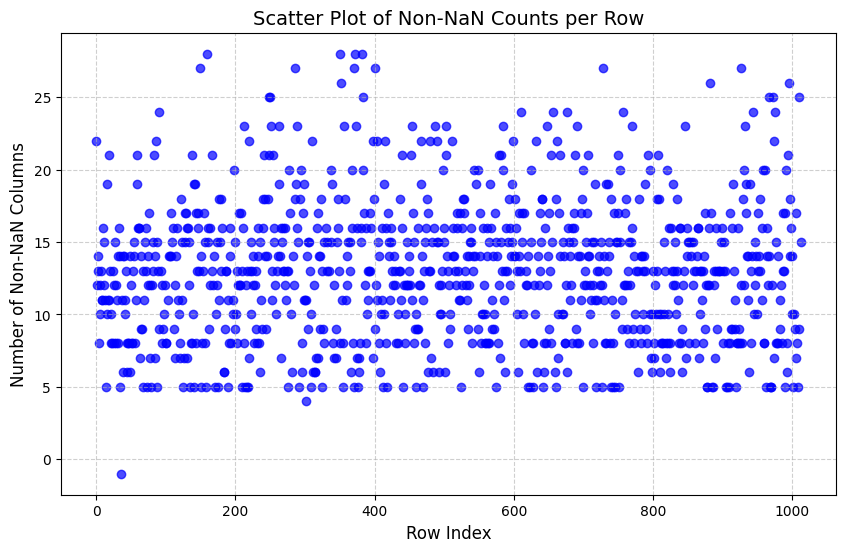

In [633]:

# Step 1: Count the number of non-NaN values for each row
df_act_flow_filtered['Non-NaN Count'] = df_act_flow_filtered.notnull().sum(axis=1) -1

# Step 2: Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_act_flow_filtered.index, df_act_flow_filtered['Non-NaN Count'], alpha=0.7, color='blue')
plt.title('Scatter Plot of Non-NaN Counts per Row', fontsize=14)
plt.xlabel('Row Index', fontsize=12)
plt.ylabel('Number of Non-NaN Columns', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [634]:
# Filter the merged_dfFrame to include only rows where Activity == 'ER Registration'
df_er_registration = df[df['Activity'] == 'ER Registration']

# Reset index for cleanliness (optional)
df_er_registration = df_er_registration.reset_index(drop=True)

df_er_registration.shape

(1013, 28)

In [635]:
df_other_attributes = df_er_registration.drop(columns=['Activity', 'Leucocytes', 'CRP', 'LacticAcid'])
df_other_attributes.head()

,Case ID,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,Age,...,SIRSCriteria2OrMore,DiagnosticXthorax,SIRSCritTemperature,DiagnosticUrinaryCulture,SIRSCritLeucos,Oligurie,DiagnosticLacticAcid,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG
0,A,True,True,True,True,True,True,True,True,85.0,...,True,True,True,True,False,False,True,False,True,True
1,B,True,True,False,True,False,True,True,False,45.0,...,True,True,True,True,False,False,True,False,True,True
2,C,True,True,False,False,False,True,True,True,55.0,...,True,False,True,True,False,False,True,False,True,True
3,D,True,True,False,True,False,True,True,True,70.0,...,True,True,True,False,False,False,True,False,False,True
4,E,True,True,False,True,False,True,True,True,75.0,...,True,True,True,True,False,False,True,False,True,True


In [636]:
df_diagnosis = df[['Case ID', 'Activity','Leucocytes', 'CRP', 'LacticAcid']]
df_diagnosis = df_diagnosis.dropna(subset=['Leucocytes', 'CRP', 'LacticAcid'], how='all', ignore_index=True)
columns_to_convert = ['Leucocytes', 'CRP', 'LacticAcid']
df_diagnosis[columns_to_convert]=df_diagnosis[columns_to_convert].astype(float)
df_diagnosis.head(20)

,Case ID,Activity,Leucocytes,CRP,LacticAcid
0,A,Leucocytes,9.6,NaN,NaN
1,A,CRP,NaN,21.0,NaN
2,A,LacticAcid,NaN,NaN,2.2
3,A,CRP,NaN,109.0,NaN
4,A,Leucocytes,8.7,NaN,NaN
5,A,Leucocytes,9.6,NaN,NaN
6,A,CRP,NaN,47.0,NaN
7,A,Leucocytes,10.7,NaN,NaN
8,A,CRP,NaN,15.0,NaN
9,A,CRP,NaN,9.0,NaN


In [637]:
df_other_attributes.shape

(1013, 24)

In [638]:
# Exclude the 'Case ID' and 'Age' columns
columns_to_count = [col for col in df_other_attributes.columns if col not in ['Case ID', 'Age']]

# Create a dictionary to store counts of True and False for each column
true_false_counts = {col: df_other_attributes[col].value_counts() for col in columns_to_count}

# Convert the counts to a DataFrame for better readability
result_df = pd.DataFrame(true_false_counts).fillna(0).astype(int).T  # Transpose for better display
result_df.columns = ['False', 'True']  # Rename the columns
result_df = result_df[['True', 'False']]  # Reorder for clarity

print(result_df)


                           True  False
InfectionSuspected          848    165
DiagnosticBlood             823    190
DisfuncOrg                   69    944
SIRSCritTachypnea           601    412
Hypotensie                   54    959
SIRSCritHeartRate           810    203
Infusion                    796    217
DiagnosticArtAstrup         297    716
DiagnosticIC                848    165
DiagnosticSputum             29    984
DiagnosticLiquor              5   1008
DiagnosticOther              10   1003
SIRSCriteria2OrMore         853    160
DiagnosticXthorax           785    228
SIRSCritTemperature         800    213
DiagnosticUrinaryCulture    476    537
SIRSCritLeucos               49    964
Oligurie                     25    988
DiagnosticLacticAcid        804    209
Hypoxie                      20    993
DiagnosticUrinarySediment   519    494
DiagnosticECG               765    248


In [639]:
# List of columns to drop
columns_to_drop = ['DiagnosticLiquor', 'DiagnosticOther', 'SIRSCritLeucos', 'Oligurie', 'Hypoxie']

# Drop the columns from the DataFrame
df_other_attributes = df_other_attributes.drop(columns=columns_to_drop)

# Verify the remaining columns
print(df_other_attributes.columns)


Index(['Case ID', 'InfectionSuspected', 'DiagnosticBlood', 'DisfuncOrg',
       'SIRSCritTachypnea', 'Hypotensie', 'SIRSCritHeartRate', 'Infusion',
       'DiagnosticArtAstrup', 'Age', 'DiagnosticIC', 'DiagnosticSputum',
       'SIRSCriteria2OrMore', 'DiagnosticXthorax', 'SIRSCritTemperature',
       'DiagnosticUrinaryCulture', 'DiagnosticLacticAcid',
       'DiagnosticUrinarySediment', 'DiagnosticECG'],
      dtype='object')


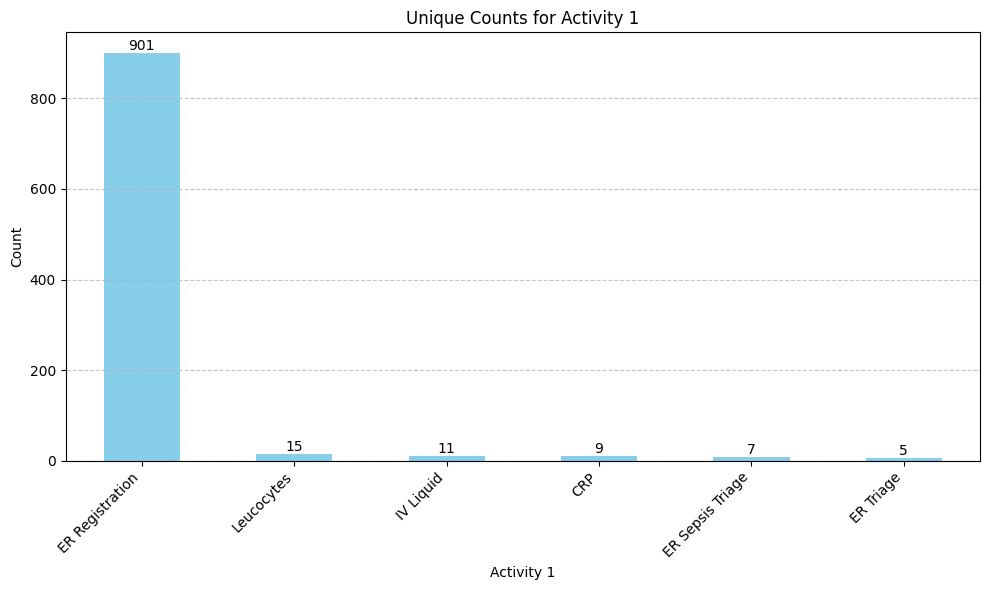

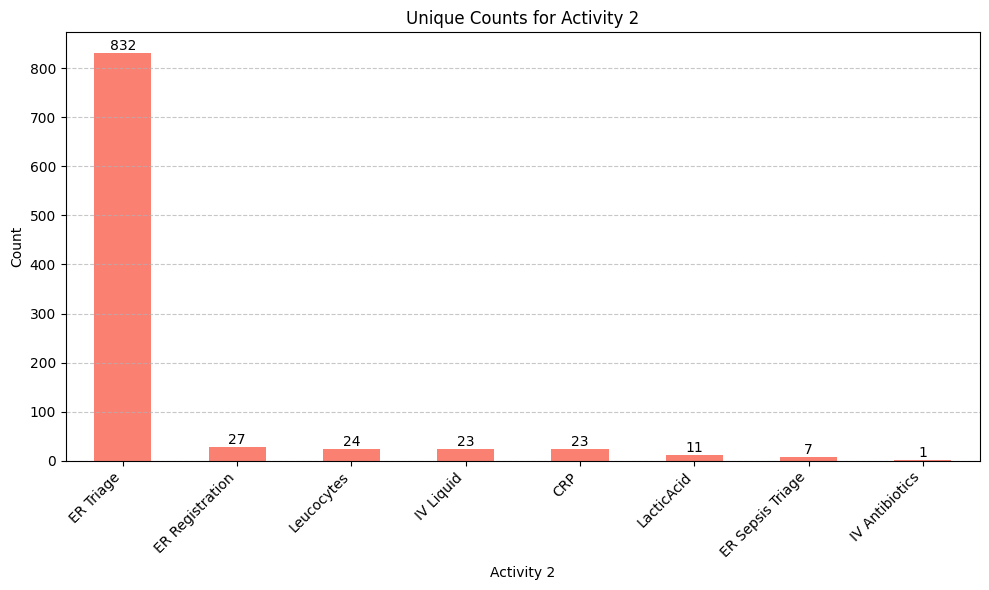

In [640]:
# Count unique values in Activity 1
activity_1_counts = df_act_flow_filtered['Activity 1'].value_counts()

# Count unique values in Activity 2
activity_2_counts = df_act_flow_filtered['Activity 2'].value_counts()

import matplotlib.pyplot as plt

# Count unique values in Activity 1 and Activity 2
activity_1_counts = df_act_flow_filtered['Activity 1'].value_counts()
activity_2_counts = df_act_flow_filtered['Activity 2'].value_counts()

# Function to add value labels on top of the bars
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

# Create bar chart for Activity 1
plt.figure(figsize=(10, 6))
ax1 = activity_1_counts.plot(kind='bar', color='skyblue')
plt.title('Unique Counts for Activity 1')
plt.xlabel('Activity 1')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(ax1)  # Add numbers on top of bars
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Create bar chart for Activity 2
plt.figure(figsize=(10, 6))
ax2 = activity_2_counts.plot(kind='bar', color='salmon')
plt.title('Unique Counts for Activity 2')
plt.xlabel('Activity 2')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(ax2)  # Add numbers on top of bars
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



In [641]:
# Step 1: Filter df_act_flow_filtered based on Activity 1 and Activity 2 conditions
valid_case_ids = df_act_flow_filtered[
    (df_act_flow_filtered['Activity 1'] == 'ER Registration') &
    (df_act_flow_filtered['Activity 2'] == 'ER Triage')
]['Case ID']

# Step 2: Retain only rows with valid Case IDs in df_other_attributes and df_diagnosis
df_act_flow_filtered = df_act_flow_filtered[df_act_flow_filtered['Case ID'].isin(valid_case_ids)]
df_other_attributes = df_other_attributes[df_other_attributes['Case ID'].isin(valid_case_ids)]
df_diagnosis = df_diagnosis[df_diagnosis['Case ID'].isin(valid_case_ids)]



In [642]:
df_act_flow_filtered.columns

Index(['Case ID', 'Activity 1', 'Activity 2', 'Activity 3', 'Activity 4',
       'Activity 5', 'Activity 6', 'Activity 7', 'Activity 8', 'Activity 9',
       'Activity 10', 'Activity 11', 'Activity 12', 'Activity 13',
       'Activity 14', 'Activity 15', 'Activity 16', 'Activity 17',
       'Activity 18', 'Activity 19', 'Activity 20', 'Activity 21',
       'Activity 22', 'Activity 23', 'Activity 24', 'Activity 25',
       'Activity 26', 'Activity 27', 'Activity 28', 'Activity 29',
       'Non-NaN Count'],
      dtype='object')

In [643]:
# Select the activity columns
activity_columns = [f'Activity {i}' for i in range(1, 30)]  # Activity 1 to Activity 29

# Function to find the last non-null activity in each row
def get_final_activity(row):
    for activity in reversed(activity_columns):
        if pd.notnull(row[activity]):
            return row[activity]
    return None  # Return None if all activities are NaN

# Apply the function to each row and create the 'Final Activity' column
df_act_flow_filtered['Final Activity'] = df_act_flow_filtered.apply(get_final_activity, axis=1)

# Verify the result
print(df_act_flow_filtered[['Case ID'] + activity_columns + ['Final Activity']].head())


  Case ID       Activity 1 Activity 2        Activity 3  Activity 4  \
1       B  ER Registration  ER Triage               CRP  LacticAcid   
2       C  ER Registration  ER Triage  ER Sepsis Triage  Leucocytes   
3       D  ER Registration  ER Triage  ER Sepsis Triage         CRP   
4       E  ER Registration  ER Triage  ER Sepsis Triage   IV Liquid   
5       F  ER Registration  ER Triage  ER Sepsis Triage  Leucocytes   

   Activity 5        Activity 6      Activity 7      Activity 8    Activity 9  \
1  Leucocytes  ER Sepsis Triage       IV Liquid  IV Antibiotics  Admission NC   
2         CRP         IV Liquid  IV Antibiotics    Admission NC  Admission NC   
3  LacticAcid        Leucocytes       IV Liquid  IV Antibiotics  Admission NC   
4         CRP        Leucocytes      LacticAcid  IV Antibiotics           NaN   
5         CRP        LacticAcid  IV Antibiotics       IV Liquid  Admission NC   

   ... Activity 21 Activity 22 Activity 23 Activity 24 Activity 25  \
1  ...         N

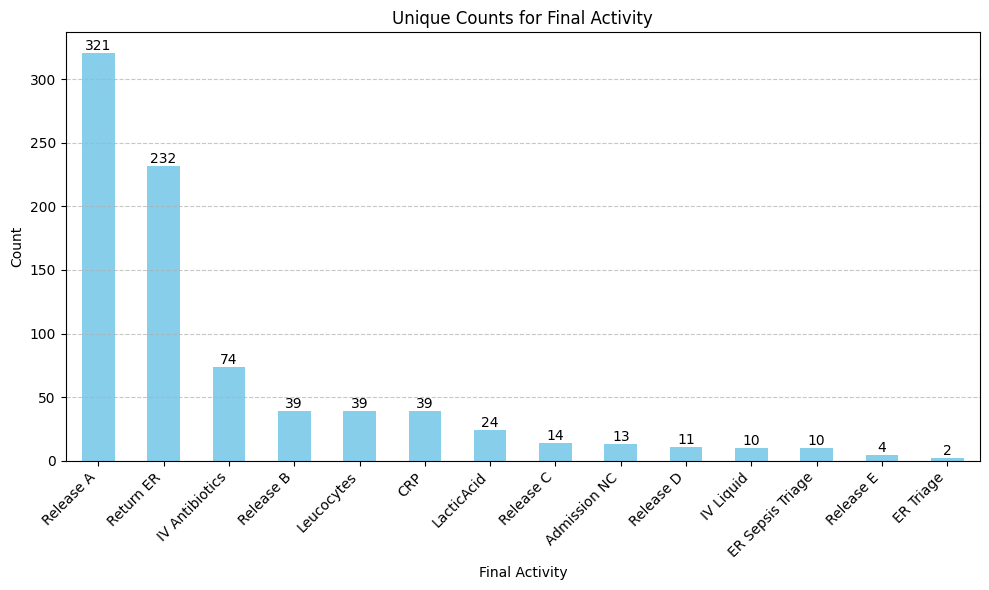

In [644]:

#create a bar chart for the 'Final Activity' column
final_activity_counts = df_act_flow_filtered['Final Activity'].value_counts()
plt.figure(figsize=(10, 6))
ax = final_activity_counts.plot(kind='bar', color='skyblue')
plt.title('Unique Counts for Final Activity')
plt.xlabel('Final Activity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(ax)  # Add numbers on top of bars
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [645]:
# Step 1: Identify rows where 'Final Activity' is either 'ER Triage' or 'Release E'
invalid_case_ids = df_act_flow_filtered[
    df_act_flow_filtered['Final Activity'].isin(['ER Triage', 'Release E'])
]['Case ID']

# Step 2: Remove the rows from df_act_flow_filtered, df_other_attributes, and df_diagnosis based on invalid_case_ids
df_act_flow_filtered = df_act_flow_filtered[~df_act_flow_filtered['Case ID'].isin(invalid_case_ids)]
df_other_attributes = df_other_attributes[~df_other_attributes['Case ID'].isin(invalid_case_ids)]
df_diagnosis = df_diagnosis[~df_diagnosis['Case ID'].isin(invalid_case_ids)]

df_act_flow_filtered.shape

(826, 32)

In [646]:
df_act_flow_filtered.to_csv('Sepsis_Activity_Flow.csv', index=False)
df_other_attributes.to_csv('Sepsis_Other_Attributes.csv', index=False)
df_diagnosis.to_csv('Sepsis_Diagnosis.csv', index=False)

In [647]:
# Merge merged_dfsets on 'Case ID'
merged_df = (
    df_act_flow_filtered
    .merge(df_diagnosis, on="Case ID", how="left")
    .merge(df_other_attributes, on="Case ID", how="left")
)

# Display a summary of the merged merged_dfset
merged_df.head()


,Case ID,Activity 1,Activity 2,Activity 3,Activity 4,Activity 5,Activity 6,Activity 7,Activity 8,Activity 9,...,Age,DiagnosticIC,DiagnosticSputum,SIRSCriteria2OrMore,DiagnosticXthorax,SIRSCritTemperature,DiagnosticUrinaryCulture,DiagnosticLacticAcid,DiagnosticUrinarySediment,DiagnosticECG
0,B,ER Registration,ER Triage,CRP,LacticAcid,Leucocytes,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,45.0,True,True,True,True,True,True,True,True,True
1,B,ER Registration,ER Triage,CRP,LacticAcid,Leucocytes,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,45.0,True,True,True,True,True,True,True,True,True
2,B,ER Registration,ER Triage,CRP,LacticAcid,Leucocytes,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,45.0,True,True,True,True,True,True,True,True,True
3,B,ER Registration,ER Triage,CRP,LacticAcid,Leucocytes,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,45.0,True,True,True,True,True,True,True,True,True
4,B,ER Registration,ER Triage,CRP,LacticAcid,Leucocytes,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,45.0,True,True,True,True,True,True,True,True,True


In [648]:
merged_df.columns

Index(['Case ID', 'Activity 1', 'Activity 2', 'Activity 3', 'Activity 4',
       'Activity 5', 'Activity 6', 'Activity 7', 'Activity 8', 'Activity 9',
       'Activity 10', 'Activity 11', 'Activity 12', 'Activity 13',
       'Activity 14', 'Activity 15', 'Activity 16', 'Activity 17',
       'Activity 18', 'Activity 19', 'Activity 20', 'Activity 21',
       'Activity 22', 'Activity 23', 'Activity 24', 'Activity 25',
       'Activity 26', 'Activity 27', 'Activity 28', 'Activity 29',
       'Non-NaN Count', 'Final Activity', 'Activity', 'Leucocytes', 'CRP',
       'LacticAcid', 'InfectionSuspected', 'DiagnosticBlood', 'DisfuncOrg',
       'SIRSCritTachypnea', 'Hypotensie', 'SIRSCritHeartRate', 'Infusion',
       'DiagnosticArtAstrup', 'Age', 'DiagnosticIC', 'DiagnosticSputum',
       'SIRSCriteria2OrMore', 'DiagnosticXthorax', 'SIRSCritTemperature',
       'DiagnosticUrinaryCulture', 'DiagnosticLacticAcid',
       'DiagnosticUrinarySediment', 'DiagnosticECG'],
      dtype='object')

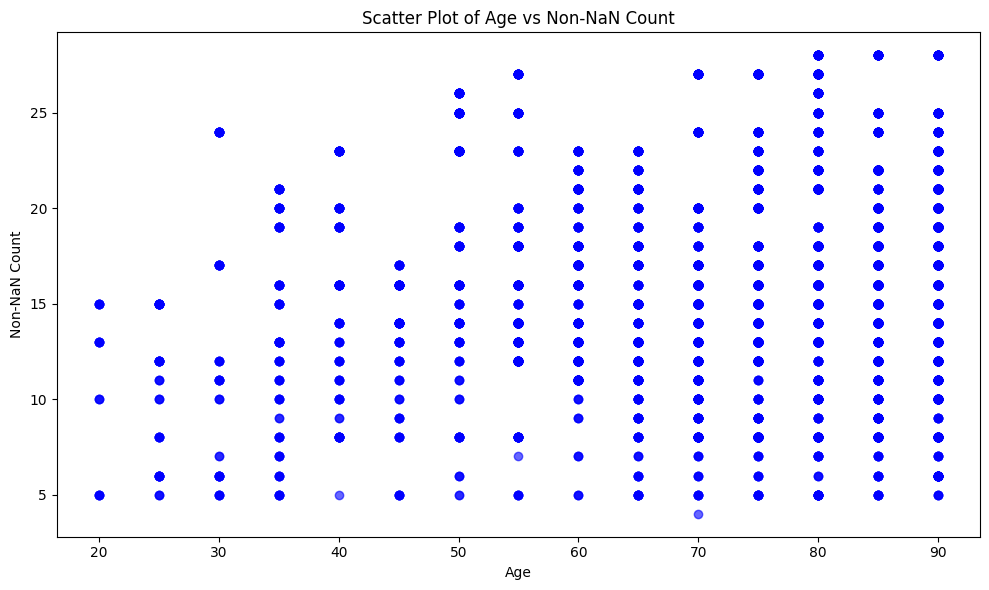

In [649]:
import matplotlib.pyplot as plt

# Scatter plot of Age vs Non-NaN Count
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Age'], merged_df['Non-NaN Count'], color='blue', alpha=0.6)

# Add labels and title
plt.title('Scatter Plot of Age vs Non-NaN Count')
plt.xlabel('Age')
plt.ylabel('Non-NaN Count')

# Display the plot
plt.tight_layout()
plt.show()


In [650]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# ---------- STEP 1: MODEL TO PREDICT SECOND ACTIVITY ----------

# Select features from Other Attributes dataset
X = merged_df[['InfectionSuspected', 'DisfuncOrg', 'SIRSCritTachypnea', 'Hypotensie',
              'SIRSCritHeartRate', 'SIRSCriteria2OrMore', 'SIRSCritTemperature',
              'DiagnosticBlood', 'DiagnosticArtAstrup', 'Age', 'DiagnosticIC',
              'DiagnosticSputum', 'DiagnosticXthorax', 'DiagnosticLacticAcid',
              'DiagnosticUrinaryCulture', 'DiagnosticUrinarySediment', 'DiagnosticECG',
              'Infusion']]  # Use all relevant columns

# Target: Second Activity
y = merged_df['Activity 2']  # Assuming 'Activity_2' represents the second activity

# Encode target variable
activity_mapping = {activity: idx for idx, activity in enumerate(y.unique())}
y_encoded = y.map(activity_mapping)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Scale only 'Age' column
scaler = StandardScaler()
X_train['Age'] = scaler.fit_transform(X_train[['Age']])  # Scale 'Age'
X_test['Age'] = scaler.transform(X_test[['Age']])       # Scale 'Age'

# Train model
rf_second_activity = RandomForestClassifier(n_estimators=100, random_state=42)
rf_second_activity.fit(X_train, y_train)

# Evaluate model
y_pred = rf_second_activity.predict(X_test)
print("Accuracy for Second Activity:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ---------- STEP 2: RULES FOR SUBSEQUENT ACTIVITIES ----------

# # Function to predict next activity based on diagnosis values
# def predict_next_activity(current_activity, leucocytes, crp, lactic_acid):
#     if current_activity == 'Leucocytes':
#         if leucocytes > 15:  # Example threshold
#             return 'IV Antibiotics'
#         else:
#             return 'CRP'
#     elif current_activity == 'CRP':
#         if crp > 100:  # Example threshold
#             return 'IV Antibiotics'
#         else:
#             return 'LacticAcid'
#     elif current_activity == 'LacticAcid':
#         if lactic_acid > 2.0:  # Example threshold
#             return 'ICU Admit'
#         else:
#             return 'Discharge'
#     else:
#         return 'END'

# ---------- STEP 3: FINAL PREDICTION PIPELINE ----------

def predict_pipeline():
    print("\n--- Patient Information ---")
    # Collect user input
    age = float(input("Age: "))
    infection_suspected = int(input("Infection Suspected (0 or 1): "))
    disfunc_org = int(input("Organ Dysfunction (0 or 1): "))
    sirs_criteria = int(input("SIRS Criteria 2 or more (0 or 1): "))
    hypotensie = int(input("Hypotension (0 or 1): "))
    diagnostic_blood = int(input("Diagnostic Blood (0 or 1): "))
    diagnostic_lactic_acid = int(input("Diagnostic Lactic Acid (0 or 1): "))

    # Predict Second Activity
    input_features = np.array([[infection_suspected, disfunc_org, 0, hypotensie, 0,
                                sirs_criteria, 0, diagnostic_blood, 0, age,
                                0, 0, 0, diagnostic_lactic_acid, 0, 0, 0, 0]])  # Replace 0s if more inputs are needed
    input_scaled = scaler.transform(input_features[:, [9]])  # Scale only 'Age'
    input_features[:, 9] = input_scaled[:, 0]  # Replace scaled 'Age'

    second_activity_pred = rf_second_activity.predict(input_features)[0]
    second_activity = [key for key, value in activity_mapping.items() if value == second_activity_pred][0]
    print(f"Predicted Second Activity: {second_activity}")

    # Predict Subsequent Activities
    # current_activity = second_activity
    # while current_activity != 'END':
    #     # Get diagnostic values
    #     leucocytes = float(input(f"{current_activity} - Leucocytes: "))
    #     crp = float(input(f"{current_activity} - CRP: "))
    #     lactic_acid = float(input(f"{current_activity} - Lactic Acid: "))

    #     # Predict next activity based on diagnosis trends
    #     next_activity = predict_next_activity(current_activity, leucocytes, crp, lactic_acid)
    #     print(f"Next Activity: {next_activity}")

    #     # Update current activity
    #     if next_activity == 'END':
    #         break
    #     current_activity = next_activity

# Call the pipeline
predict_pipeline()


Accuracy for Second Activity: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1491

    accuracy                           1.00      1491
   macro avg       1.00      1.00      1.00      1491
weighted avg       1.00      1.00      1.00      1491


--- Patient Information ---
Predicted Second Activity: ER Triage


f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
